In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
from sklearn.metrics import classification_report

#feature selection using stats Model
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

!pip install ctgan
from ctgan import CTGAN



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.9/74.9 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.2 MB/s eta 0:00:00


In [2]:
from google.colab import files
x = files.upload()

In [3]:
dataset_1= pd.read_csv('online_shoppers_intention.csv') # loading the dataset

In [4]:
!pip install ctgan

In [5]:
dataset_1.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [6]:
dataset_1.tail(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12320,0,0.00,0,0.0,8,143.583333,0.014286,0.050000,0.000000,0.0,Nov,2,2,3,1,Returning_Visitor,False,False
12321,0,0.00,0,0.0,6,0.000000,0.200000,0.200000,0.000000,0.0,Nov,1,8,4,1,Returning_Visitor,False,False
12322,6,76.25,0,0.0,22,1075.250000,0.000000,0.004167,0.000000,0.0,Dec,2,2,4,2,Returning_Visitor,False,False
12323,2,64.75,0,0.0,44,1157.976190,0.000000,0.013953,0.000000,0.0,Nov,2,2,1,10,Returning_Visitor,False,False
12324,0,0.00,1,0.0,16,503.000000,0.000000,0.037647,0.000000,0.0,Nov,2,2,1,1,Returning_Visitor,False,False
12325,3,145.00,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.00,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.00,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.00,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False
12329,0,0.00,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,Nov,3,2,1,2,New_Visitor,True,False


In [7]:
dataset_1.shape

(12330, 18)

## Preparing the Dataset

1. Checking for missing/null values.
2. Examining the information in the columns.
3. The fundamental statistics of the numeric column.


In [8]:
print(dataset_1.columns[dataset_1.isna().any()])

Index([], dtype='object')


In [9]:
dataset_1.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [11]:
dataset_1.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


# EDA ( Explolatory Data Analysis)

In [12]:
import plotly.express as px    # For Creating Interactive graphs

# Distribution of Target Variable

In [13]:
Revenue_count = dataset_1['Revenue'].value_counts()
print(Revenue_count)

False    10422
True      1908
Name: Revenue, dtype: int64


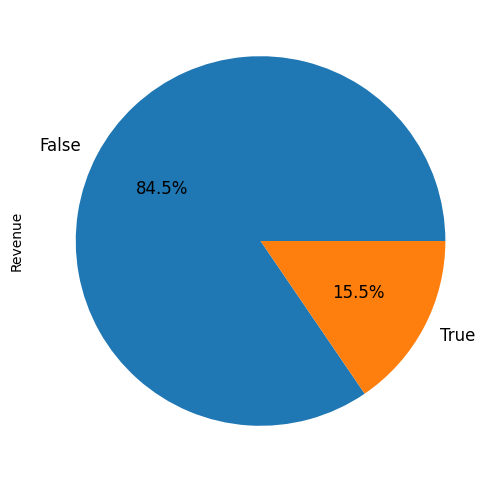

In [14]:
fig = plt.figure(figsize=(10,6))
ax = (dataset_1['Revenue'].value_counts()*100.0 /len(dataset_1)).plot.pie(autopct='%.1f%%',fontsize=12)

In [15]:
ProductRelated= px.histogram(dataset_1, x = 'ProductRelated', color = 'Revenue', title="ProductRelated Vs Revenue")
ProductRelated.show()

**Distribution of SpecialDay with Revenue**

In [16]:
SpecialDay= px.histogram(dataset_1, x='SpecialDay', color="Revenue", title="Distribution of SpecialDay with Revenue")
SpecialDay.show()

**Distribution of VisitorType with Revenue**

In [17]:
VisitorType= px.histogram(dataset_1, x='VisitorType', color="Revenue", title="Distribution of VisitorType with Revenue")
VisitorType.show()

**Distribution of Month with Revenue**

In [18]:
Month= px.histogram(dataset_1, x='Month', color="Revenue", title="Distribution of Month with Revenue")
Month.show()

**Distribution of Weekend with Revenue**

In [19]:
Weekend= px.histogram(dataset_1, x='Weekend', color="Revenue", title="Distribution of Weekend with Revenue")
Weekend.show()

# Data Processing



In [20]:
numeric_data = dataset_1.select_dtypes(['int', 'float']).columns

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(1, 0, 'Administrative'),
  Text(2, 0, 'Administrative_Duration'),
  Text(3, 0, 'Informational'),
  Text(4, 0, 'Informational_Duration'),
  Text(5, 0, 'ProductRelated'),
  Text(6, 0, 'ProductRelated_Duration'),
  Text(7, 0, 'BounceRates'),
  Text(8, 0, 'ExitRates'),
  Text(9, 0, 'PageValues'),
  Text(10, 0, 'SpecialDay'),
  Text(11, 0, 'OperatingSystems'),
  Text(12, 0, 'Browser'),
  Text(13, 0, 'Region'),
  Text(14, 0, 'TrafficType')])

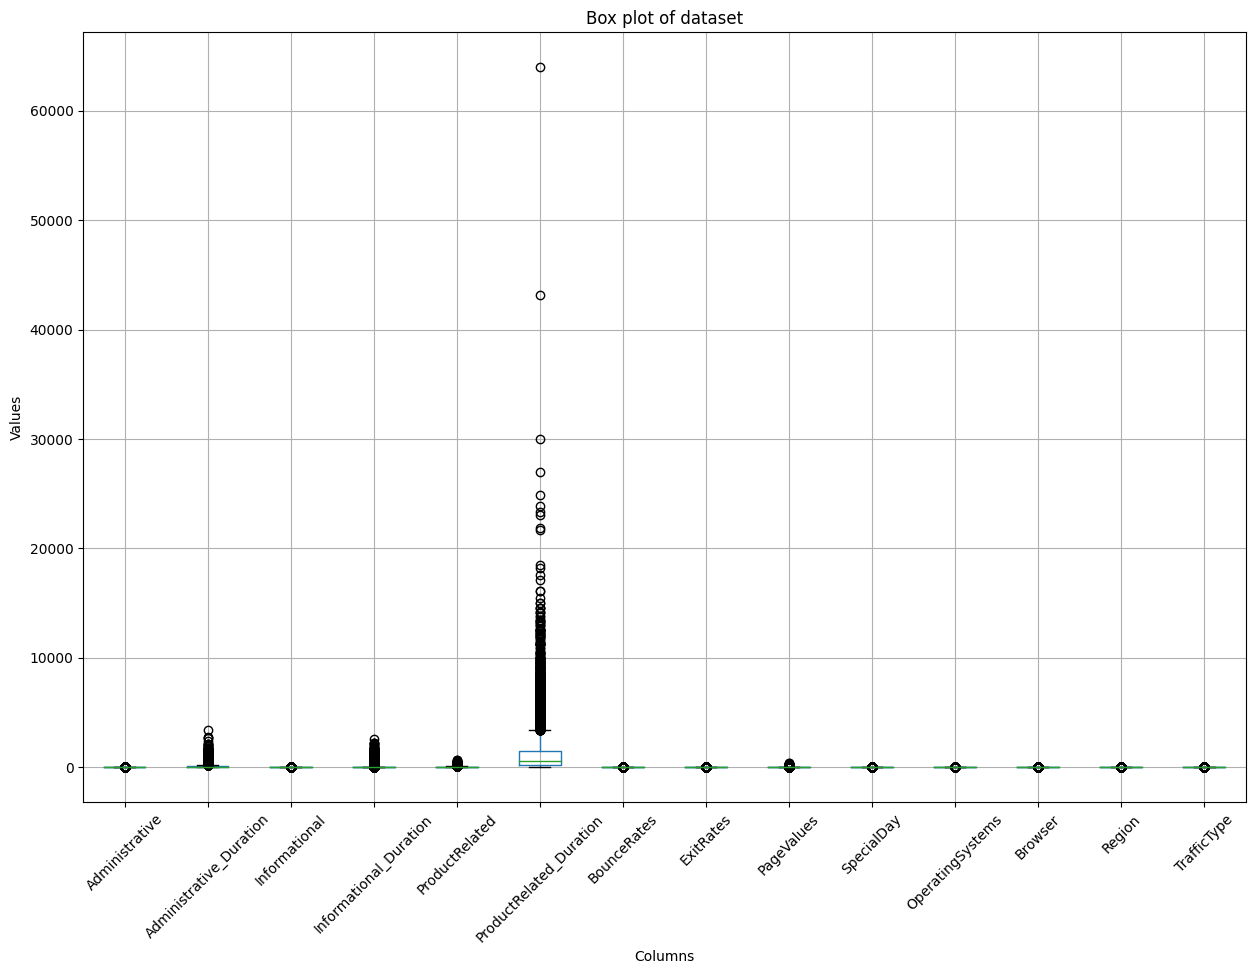

In [21]:
fig, ax = plt.subplots(figsize=(15, 10))
dataset_1[numeric_data].boxplot(ax=ax)
plt.title('Box plot of dataset')
plt.xlabel('Columns')
plt.ylabel('Values')
plt.xticks(rotation=45)

In [22]:
# Find categorical columns
categorical_values = []
for i in dataset_1.columns:
    if dataset_1[i].dtype == "object":
        categorical_values.append(i)

print("Categorical columns are :", categorical_values)

Categorical columns are : ['Month', 'VisitorType']


In [23]:
# Find boolean columns
bool_values = []
for i in dataset_1.columns:
    if dataset_1[i].dtype == "bool":
        bool_values.append(i)

print("Bool columns are :", bool_values)

Bool columns are : ['Weekend', 'Revenue']


In [24]:
from sklearn import preprocessing

In [25]:
number = preprocessing.LabelEncoder()

In [26]:
for i in categorical_values:
    dataset_1[i] = number.fit_transform(dataset_1[i])

In [27]:
dataset_1.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,False,False
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,7,3,2,1,2,0,True,False


In [28]:
for i in bool_values:
    dataset_1[i] = number.fit_transform(dataset_1[i])

In [29]:
dataset_1.tail(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,1,4,6,1,1,2,1,0
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,7,3,2,1,8,2,1,0
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,7,3,2,1,13,2,1,0
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,7,2,2,3,11,2,0,0
12329,0,0.0,0,0.0,3,21.250000,0.000000,0.066667,0.000000,0.0,7,3,2,1,2,0,1,0


GAN

In [30]:
# Split the dataset into two classes
minority_class = dataset_1[dataset_1['Revenue'] ==1]
majority_class = dataset_1[dataset_1['Revenue'] == 0]

In [31]:
from ctgan import CTGAN

In [32]:
model = CTGAN(verbose=True)

In [33]:
model.fit(minority_class)

Gen. (-3.22) | Discrim. (-0.03): 100%|██████████| 300/300 [01:42<00:00,  2.92it/s]


In [34]:
new_data = model.sample(8514)

In [35]:
new_data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3,20.833335,3,107.077931,27,753.278071,0.010180,0.037985,31.580545,0.006268,7,3,2,9,2,2,0,1
1,0,776.394976,2,-1.586795,-9,315.832426,0.006379,0.006033,33.287710,0.005366,1,2,2,1,7,2,0,1
2,3,93.111902,3,6.983429,23,801.125945,-0.002376,0.012426,-2.546202,1.049178,7,2,2,8,10,2,0,1
3,0,128.849979,0,-5.339084,-5,786.813252,-0.001209,0.051825,1.041147,0.006775,7,2,2,3,3,2,0,1
4,1,468.496980,0,-8.426159,9,2185.702506,0.000715,0.045218,5.782878,0.010410,7,3,2,1,2,2,0,1


In [36]:
# Append the synthetic data to the original dataset
balanced_data = pd.concat([majority_class, new_data], ignore_index=True)

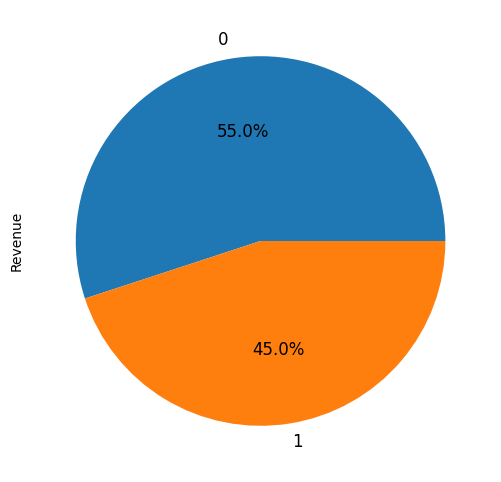

In [37]:
fig = plt.figure(figsize=(10,6))
ax = (balanced_data['Revenue'].value_counts()*100.0 /len(balanced_data)).plot.pie(autopct='%.1f%%',fontsize=12)

In [38]:
model.save('my_model.pkl')

In [39]:
X = balanced_data.drop('Revenue',axis='columns')
#print(X.shape)
#X
Y = balanced_data.Revenue

In [40]:
#feature selection using stats Model
import statsmodels.api as sm
X = sm.add_constant(X)

In [41]:
lr = sm.OLS(Y,X).fit()
print(lr.summary2())

                    Results: Ordinary least squares
Model:                 OLS               Adj. R-squared:      0.244     
Dependent Variable:    Revenue           AIC:                 22024.2410
Date:                  2024-01-29 16:31  BIC:                 22165.5198
No. Observations:      18936             Log-Likelihood:      -10994.   
Df Model:              17                F-statistic:         359.9     
Df Residuals:          18918             Prob (F-statistic):  0.00      
R-squared:             0.244             Scale:               0.18717   
------------------------------------------------------------------------
                         Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
------------------------------------------------------------------------
const                    0.3575   0.0158  22.6158 0.0000  0.3265  0.3884
Administrative          -0.0186   0.0012 -16.1941 0.0000 -0.0209 -0.0164
Administrative_Duration  0.0003   0.0000  18.3594 0.0000  0.0002  0.0003

In [42]:
p_values = lr.pvalues

In [43]:
vars = p_values[p_values<=0.05].index.tolist()

In [44]:
print(vars)


['const', 'Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend']


In [45]:
X = X[vars[1:]]

In [46]:
X.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,2,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,2,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,2,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,2,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,2,1


In [47]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Revenue, dtype: int64

# Data Normalization

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify= Y, random_state = 42)

## checking for the distribution of traget variable in train test split
print('Distribution of target variable in training dataset')
print(Y_train.value_counts())

print('Distribution of target variable in test dataset')
print(Y_test.value_counts())

Distribution of target variable in training dataset
0    7295
1    5960
Name: Revenue, dtype: int64
Distribution of target variable in test dataset
0    3127
1    2554
Name: Revenue, dtype: int64


In [49]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Model building




#**DECISION TREE**

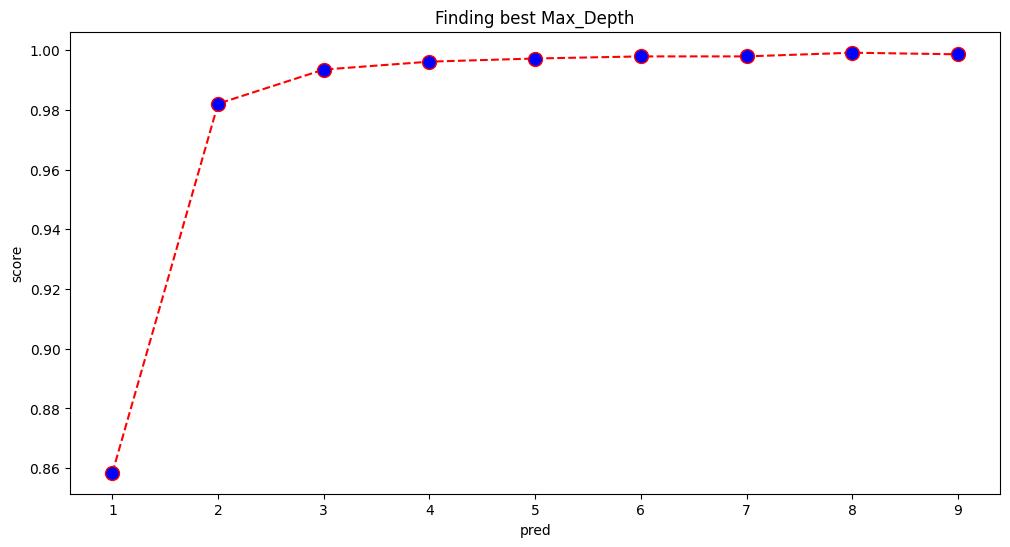

In [50]:
#Finding best max_depth Value

accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1, 10):
    model = DecisionTreeClassifier(max_depth = i, random_state = 0)
    model.fit(X_train, Y_train)
    pred = model.predict(X_test)
    score = accuracy_score(Y_test, pred)
    accuracy.append(score)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Finding best Max_Depth')
plt.xlabel('pred')
plt.ylabel('score')
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import sklearn.metrics as metrics

# create an instance of the DecisionTreeClassifier class
clf = DecisionTreeClassifier(max_depth = 7,random_state = 42)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=7, random_state=42)

In [52]:
y_pred = clf.predict(X_test)
# combining 2 numpy arrays into one pandas dataframe
final_model_predictions_DT = pd.DataFrame({'Actual':Y_test, 'predictions':y_pred})

In [53]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3127
           1       1.00      1.00      1.00      2554

    accuracy                           1.00      5681
   macro avg       1.00      1.00      1.00      5681
weighted avg       1.00      1.00      1.00      5681



In [54]:
accuracy_DT=metrics.accuracy_score( final_model_predictions_DT.Actual, final_model_predictions_DT.predictions)
print( 'Total Accuracy : ',accuracy_DT )
recall_DT=round(metrics.recall_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions ,average='weighted'),2)
print('recall :',recall_DT)
precision_DT=round(metrics.precision_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='weighted'),2)
print('Precision :',precision_DT)
F1_DT=round(metrics.f1_score(final_model_predictions_DT.Actual, final_model_predictions_DT.predictions,average='weighted'),2)
print('F1 Score :',F1_DT)

Total Accuracy :  0.9978876958281993
recall : 1.0
Precision : 1.0
F1 Score : 1.0


In [55]:
df_acc_pred=pd.DataFrame(columns=['Accuracy','Precision','Recall','F-score','Data'])

In [56]:
dati={
    'Accuracy':accuracy_DT,
    'Precision':precision_DT,
    'Recall':recall_DT,
    'F-score':F1_DT,
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['DecisionTree',:]=dati
df_acc_pred

,Accuracy,Precision,Recall,F-score,Data
DecisionTree,0.997888,1.0,1.0,1.0,Smote+Scaled


**LOGISTIC REGRESSION**




In [57]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(random_state = 42)
logmodel.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [58]:
predictions_LR = logmodel.predict(X_test)
predictions_LR

final_model_predictions_LR = pd.DataFrame({'Actual':Y_test, 'predictions':predictions_LR})

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions_LR))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3127
           1       0.73      0.72      0.72      2554

    accuracy                           0.75      5681
   macro avg       0.75      0.75      0.75      5681
weighted avg       0.75      0.75      0.75      5681



In [60]:
count_misclassified = (Y_test != predictions_LR).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(Y_test, predictions_LR)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1402
Accuracy: 0.75


In [61]:
print(classification_report(Y_test, predictions_LR))
print("----------------------------------------------------------------------------------------------------------------------")
print("----------------------------------------------------------------------------------------------------------------------")
accuracy_LR=np.round(metrics.accuracy_score( final_model_predictions_LR.Actual, final_model_predictions_LR.predictions ),2 )
accuracy_LR='{:.2f}'.format(accuracy_LR)
print( 'Total Accuracy : ',accuracy_LR)
recall_LR=metrics.recall_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='weighted')
print('recall',recall_LR)
Precision_LR=metrics.precision_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='weighted' )
print('Precision',Precision_LR)
F1_LR=round(metrics.f1_score(final_model_predictions_LR.Actual, final_model_predictions_LR.predictions,average='weighted'),2)
print('F1 Score :',F1_LR)

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      3127
           1       0.73      0.72      0.72      2554

    accuracy                           0.75      5681
   macro avg       0.75      0.75      0.75      5681
weighted avg       0.75      0.75      0.75      5681

----------------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------------
Total Accuracy :  0.75
recall 0.7532124625946136
Precision 0.7529081301981853
F1 Score : 0.75


In [62]:
dati={
    'Accuracy':accuracy_LR,
    'Precision':Precision_LR,
    'Recall':recall_LR,
    'F-score':F1_LR,
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['LogisticRegression',:]=dati
df_acc_pred

,Accuracy,Precision,Recall,F-score,Data
DecisionTree,0.997888,1.0,1.0,1.0,Smote+Scaled
LogisticRegression,0.75,0.752908,0.753212,0.75,Smote+Scaled


**GBM**

In [63]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=300,learning_rate=0.05,random_state=42,max_features=6 )

# Fit to training set
gbc.fit(X_train,Y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=6, n_estimators=300,
                           random_state=42)

In [64]:
y_pred_GBC = gbc.predict(X_test)

final_model_predictions_GBC = pd.DataFrame({'Actual':Y_test, 'predictions':y_pred_GBC})

accuracy_GBC=np.round(metrics.accuracy_score( Y_test, y_pred_GBC ),2 )*100
accuracy_GBC='{:.2f}'.format(accuracy_GBC)
print( 'Total Accuracy : ',accuracy_GBC)

Total Accuracy :  100.00


In [65]:
print(classification_report(Y_test, y_pred_GBC))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3127
           1       1.00      1.00      1.00      2554

    accuracy                           1.00      5681
   macro avg       1.00      1.00      1.00      5681
weighted avg       1.00      1.00      1.00      5681



In [66]:
# Perform 10-fold cross-validation
scores = cross_val_score(gbc, X, Y, cv=10)

print("Accuracy scores for each fold:", scores)
print("Average accuracy:", scores.mean())

Accuracy scores for each fold: [1.         1.         1.         1.         1.         0.99947202
 1.         0.99947174 1.         0.99947174]
Average accuracy: 0.9998415492859538


In [67]:
accuracy_GBC=np.round(metrics.accuracy_score( final_model_predictions_GBC.Actual, final_model_predictions_GBC.predictions ),2 )
accuracy_GBC='{:.2f}'.format(accuracy_GBC)
print( 'Total Accuracy : ',accuracy_GBC)
recall_GBC=metrics.recall_score(final_model_predictions_GBC.Actual, final_model_predictions_GBC.predictions,average='weighted')
print('recall',recall_GBC)
Precision_GBC=metrics.precision_score(final_model_predictions_GBC.Actual, final_model_predictions_GBC.predictions,average='weighted' )
print('Precision',Precision_GBC)
F1_GBC=round(metrics.f1_score(final_model_predictions_GBC.Actual, final_model_predictions_GBC.predictions,average='weighted'),2)
print('F1 Score :',F1_GBC)

Total Accuracy :  1.00
recall 0.99982397465235
Precision 0.9998240309264379
F1 Score : 1.0


In [68]:
dati={
    'Accuracy':accuracy_GBC,
    'Precision':Precision_GBC,
    'Recall':recall_GBC,
    'F-score':F1_GBC,
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['GradientBoostingClassifier',:]=dati
df_acc_pred

,Accuracy,Precision,Recall,F-score,Data
DecisionTree,0.997888,1.0,1.0,1.0,Smote+Scaled
LogisticRegression,0.75,0.752908,0.753212,0.75,Smote+Scaled
GradientBoostingClassifier,1.00,0.999824,0.999824,1.0,Smote+Scaled


**SIMPLE RNN**


In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout

In [70]:
# Define your model
model = Sequential()

# Add the first RNN layer with a specified number of units and input shape
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))

# Add the first dropout layer to prevent overfitting
model.add(Dropout(0.5))

# Add the second RNN layer
model.add(SimpleRNN(units=64, activation='relu', return_sequences=True))

# Add the second dropout layer
model.add(Dropout(0.5))

# Add the third RNN layer
model.add(SimpleRNN(units=64, activation='relu'))

# Add the third dropout layer
model.add(Dropout(0.5))

# Add the output dense layer for classification or regression
model.add(Dense(units=1, activation='sigmoid'))  # For binary classification, change activation function accordingly

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])  # Adjust the loss function as needed

# Summary of the model architecture
model.summary()


# Reshape the input data to match RNN input shape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 17, 64)            4224      
                                                                 
 dropout (Dropout)           (None, 17, 64)            0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 17, 64)            8256      
                                                                 
 dropout_1 (Dropout)         (None, 17, 64)            0         
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 6

In [71]:
# Train the model
epochs = 25
batch_size = 16
H = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, Y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, Y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Epoch 1/25
829/829 [==============================] - 19s 19ms/step - loss: 0.6085 - accuracy: 0.6524 - val_loss: 0.4920 - val_accuracy: 0.7590
Epoch 2/25
829/829 [==============================] - 15s 18ms/step - loss: 0.4680 - accuracy: 0.7743 - val_loss: 0.3797 - val_accuracy: 0.8356
Epoch 3/25
829/829 [==============================] - 17s 20ms/step - loss: 0.4160 - accuracy: 0.8072 - val_loss: 0.3675 - val_accuracy: 0.8294
Epoch 4/25
829/829 [==============================] - 14s 16ms/step - loss: 0.3749 - accuracy: 0.8332 - val_loss: 0.3330 - val_accuracy: 0.8565
Epoch 5/25
829/829 [==============================] - 15s 18ms/step - loss: 0.3406 - accuracy: 0.8533 - val_loss: 0.3414 - val_accuracy: 0.8493
Epoch 6/25
829/829 [==============================] - 14s 16ms/step - loss: 0.3174 - accuracy: 0.8650 - val_loss: 0.2823 - val_accuracy: 0.8803
Epoch 7/25
829/829 [==============================] - 15s 18ms/step - loss: 0.2858 - accuracy: 0.8835 - val_loss: 0.2511 - val_accuracy:

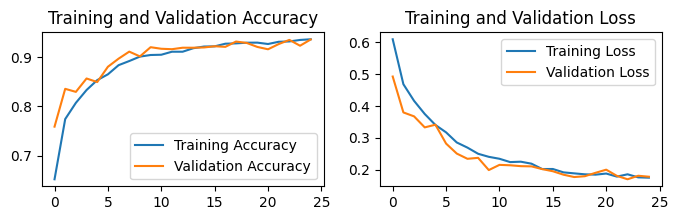

In [72]:
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']

loss = H.history['loss']
val_loss = H.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 2))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [73]:
y_pred_RNN = (model.predict(X_test) > 0.5).astype("int32")

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
#y_pred_RNN = np.argmax(y_pred_RNN, axis=1)
#print(y_pred_RNN)
y_pred_RNN = y_pred_RNN.flatten()
final_model_predictions_RNN = pd.DataFrame({'Actual':Y_test, 'predictions':y_pred_RNN})

print(classification_report(Y_test, y_pred_RNN))

178/178 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      3127
           1       0.95      0.91      0.93      2554

    accuracy                           0.94      5681
   macro avg       0.94      0.93      0.93      5681
weighted avg       0.94      0.94      0.94      5681



In [74]:
accuracy_RNN=np.round(metrics.accuracy_score( final_model_predictions_RNN.Actual, final_model_predictions_RNN.predictions ),2 )
accuracy_RNN='{:.2f}'.format(accuracy_RNN)
print( 'Total Accuracy : ',accuracy_RNN)
recall_RNN=metrics.recall_score(final_model_predictions_RNN.Actual, final_model_predictions_RNN.predictions,average='weighted')
print('recall',recall_RNN)
Precision_RNN=metrics.precision_score(final_model_predictions_RNN.Actual, final_model_predictions_RNN.predictions,average='weighted' )
print('Precision',Precision_RNN)
F1_RNN=round(metrics.f1_score(final_model_predictions_RNN.Actual, final_model_predictions_RNN.predictions,average='weighted'),2)
print('F1 Score :',F1_RNN)

Total Accuracy :  0.94
recall 0.9355747227600775
Precision 0.9358744969095513
F1 Score : 0.94


In [75]:
dati={
    'Accuracy':accuracy_RNN,
    'Precision':Precision_RNN,
    'Recall':recall_RNN,
    'F-score':F1_RNN,
    'Data':'Smote+Scaled'
}

df_acc_pred.loc['RNN',:]=dati
df_acc_pred

,Accuracy,Precision,Recall,F-score,Data
DecisionTree,0.997888,1.0,1.0,1.0,Smote+Scaled
LogisticRegression,0.75,0.752908,0.753212,0.75,Smote+Scaled
GradientBoostingClassifier,1.00,0.999824,0.999824,1.0,Smote+Scaled
RNN,0.94,0.935874,0.935575,0.94,Smote+Scaled


In [76]:
df_acc_pred['Accuracy']=df_acc_pred['Accuracy'].astype(float)

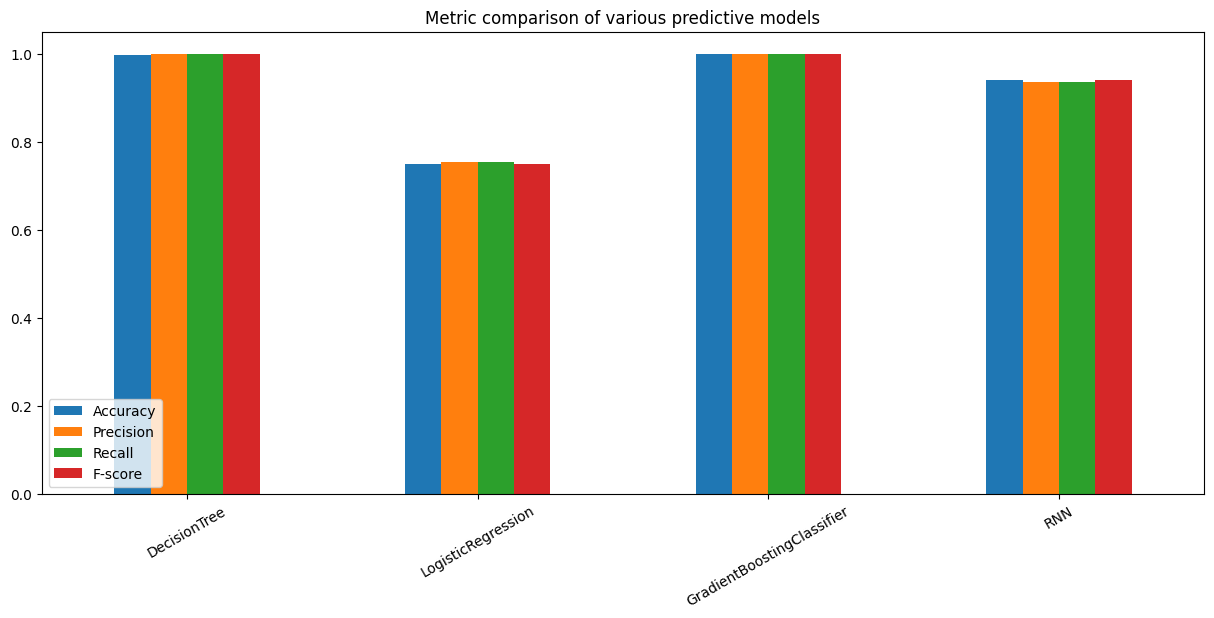

In [77]:
df_acc_pred.plot(kind='bar',figsize=(15,6))
plt.legend(loc='lower left')
plt.title('Metric comparison of various predictive models')
plt.xticks(rotation = 30);